<span style="font-size: 30px;"><b>Explanatory Data Analysis</b></span>

<b>Importing necessary packages</b>

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Display Settings</b>

In [149]:
pd.set_option("display.max_columns", None)
sns.set(style="darkgrid", palette="muted")

<b>Loading Dataset</b>

In [151]:
df = pd.read_csv("../data/raw/ks-projects-201801.csv")
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [152]:
df.shape

(378661, 15)

<b>Basic Information</b>

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [155]:
df.describe(include="all")

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,378657,378661,378661,378661,378661,3.786610e+05,378661,3.786610e+05,378661,378661.000000,378661,3.748640e+05,3.786610e+05,3.786610e+05
unique,NaN,375764,159,15,14,3164,NaN,378089,NaN,6,NaN,23,NaN,NaN,NaN
top,NaN,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,NaN,1970-01-01 01:00:00,NaN,failed,NaN,US,NaN,NaN,NaN
freq,NaN,41,22314,63585,295365,705,NaN,7,NaN,197719,NaN,292627,NaN,NaN,NaN
mean,1.074731e+09,NaN,NaN,NaN,NaN,NaN,4.908079e+04,NaN,9.682979e+03,NaN,105.617476,NaN,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,NaN,NaN,NaN,NaN,NaN,1.183391e+06,NaN,9.563601e+04,NaN,907.185035,NaN,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,NaN,NaN,NaN,NaN,NaN,1.000000e-02,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,NaN,NaN,NaN,NaN,NaN,2.000000e+03,NaN,3.000000e+01,NaN,2.000000,NaN,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,NaN,NaN,NaN,NaN,NaN,5.200000e+03,NaN,6.200000e+02,NaN,12.000000,NaN,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,NaN,NaN,NaN,NaN,NaN,1.600000e+04,NaN,4.076000e+03,NaN,56.000000,NaN,3.034090e+03,4.050000e+03,1.550000e+04


<span style="font-size: 20px;"><b>Data Cleaning</b></span>

<b>Removing duplicates</b>

In [158]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

<b>Handling missing values</b>

In [160]:
df.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

<b>Strip whitespace from strings</b>

In [162]:
df = df.applymap(lambda x:x.strip() if isinstance(x, str) else x)

C:\Users\USER\AppData\Local\Temp\ipykernel_22348\2219096728.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x:x.strip() if isinstance(x, str) else x)


<b>Convert date columns</b>

In [164]:
date_cols = ["deadline", "launched"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

<span style="font-size: 20px;"><b>Univariate Analysis</b></span>

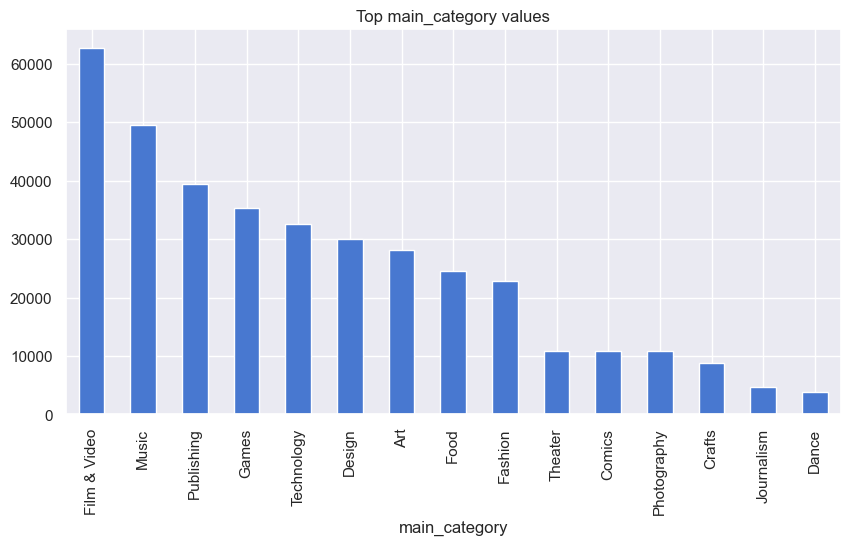

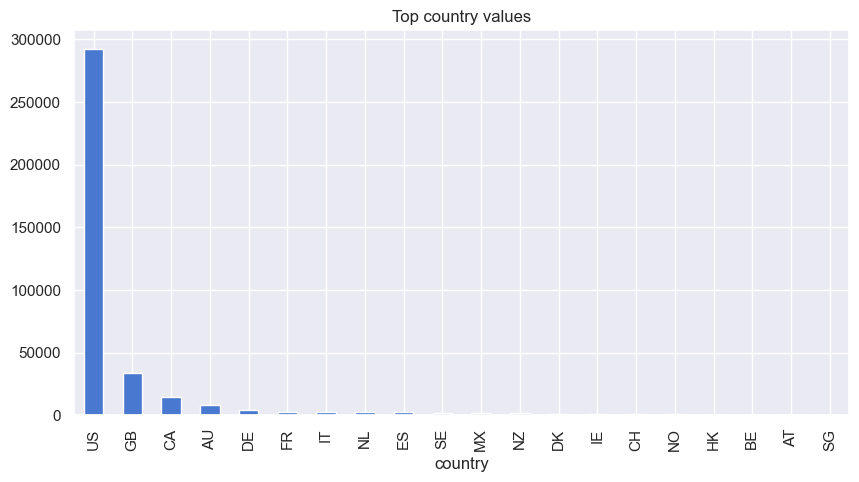

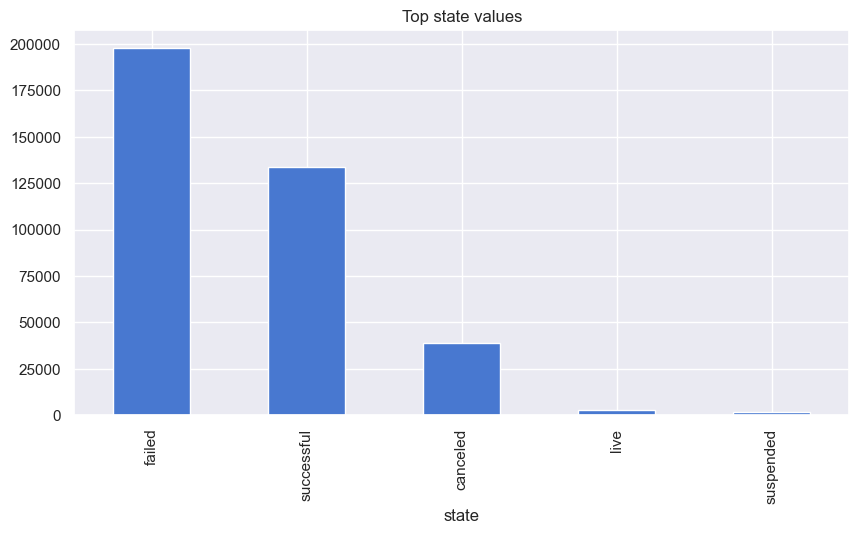

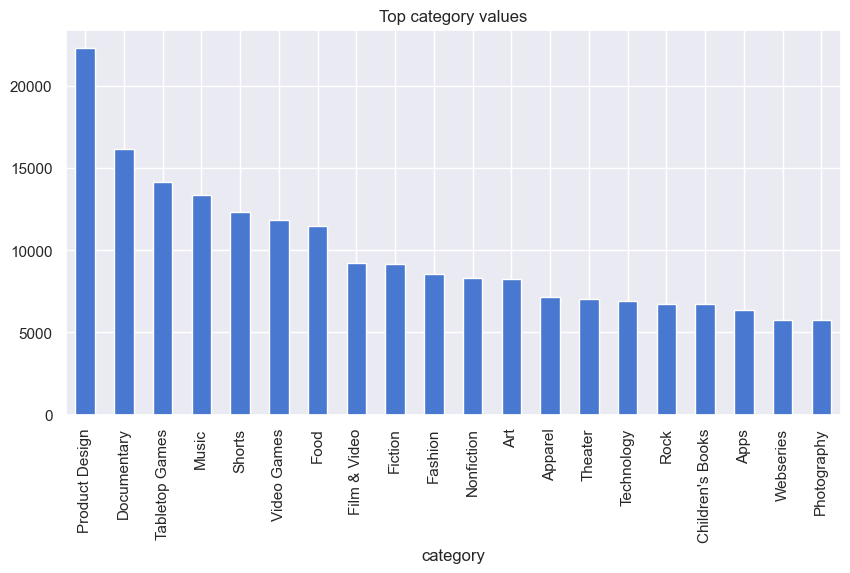

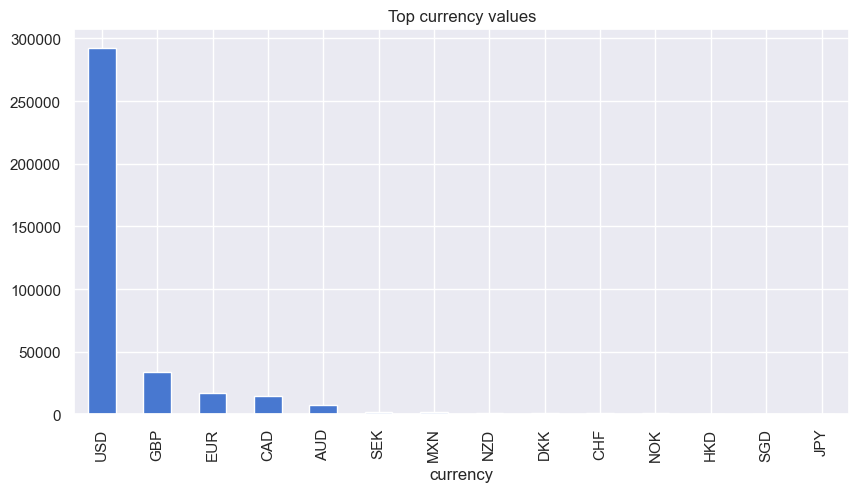

In [166]:
#categorical variables
for col in ["main_category", "country", "state", "category", "currency"]:
    plt.figure(figsize=(10,5))
    df[col].value_counts().head(20).plot(kind="bar")
    plt.title(f"Top {col} values")

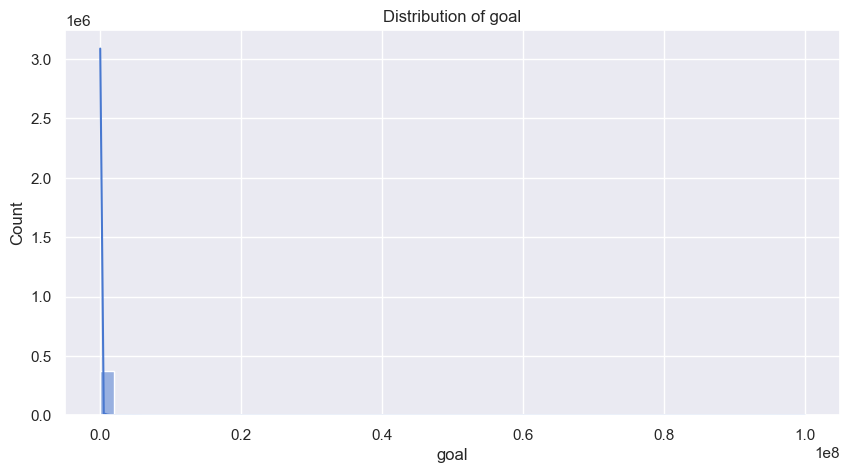

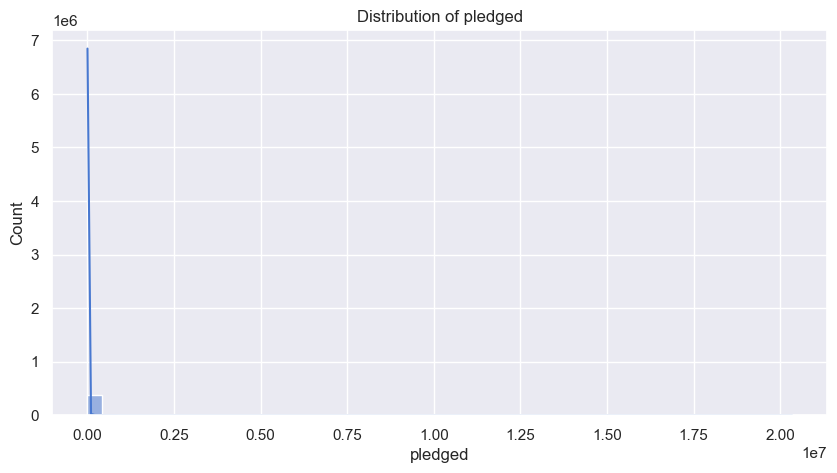

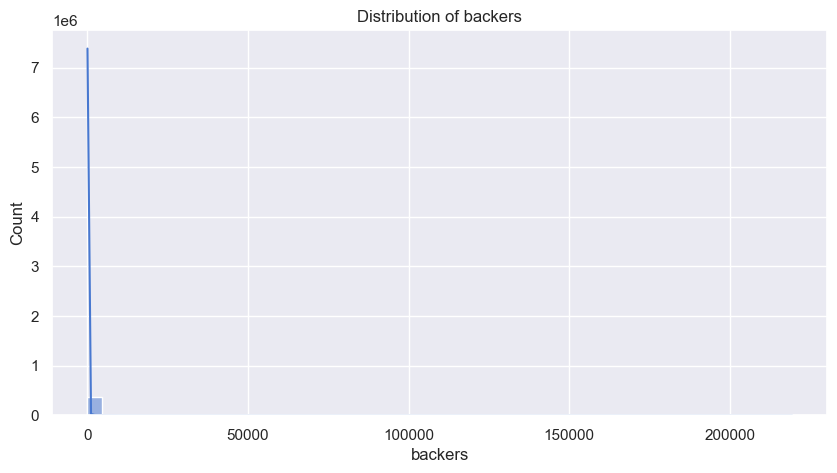

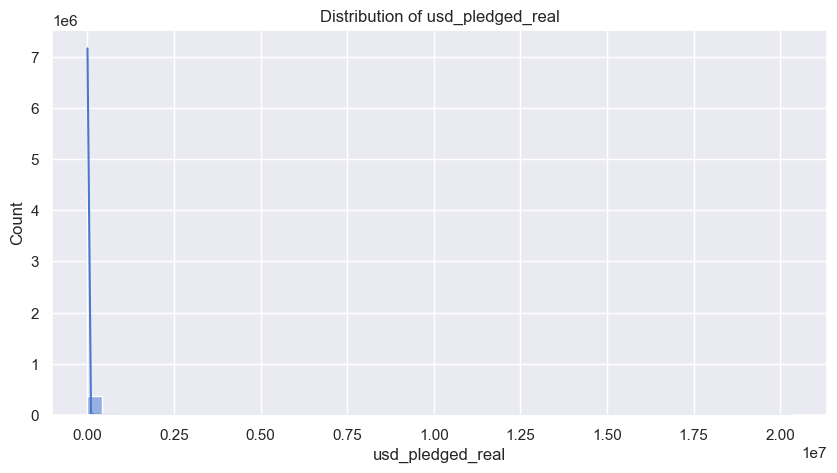

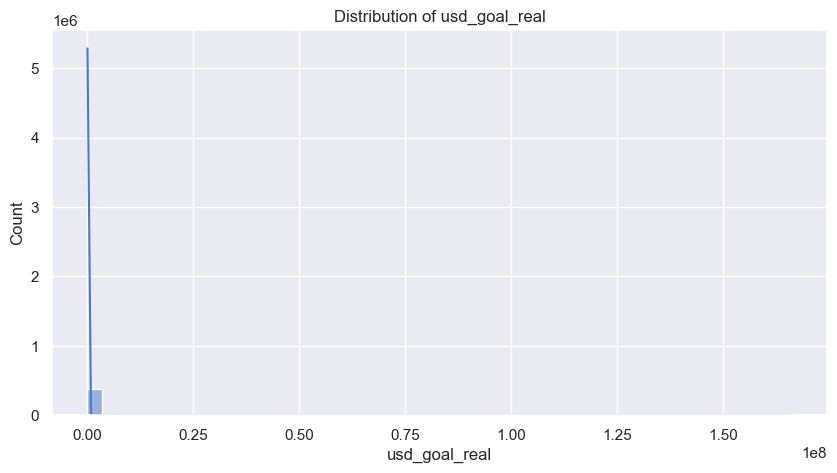

In [167]:
#numerical variables
num_features = ["goal", "pledged", "backers", "usd_pledged_real", "usd_goal_real"]
for col in num_features:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")

<b>Bivariate Analysis</b>

Text(0.5, 1.0, 'Funding by Company Status')

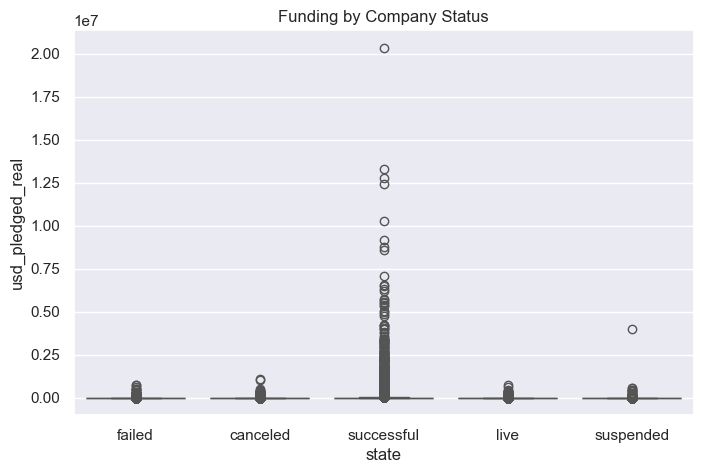

In [169]:
#funding by status
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="state", y="usd_pledged_real")
plt.title("Funding by Company Status")

Text(0.5, 1.0, 'Median funding by Country')

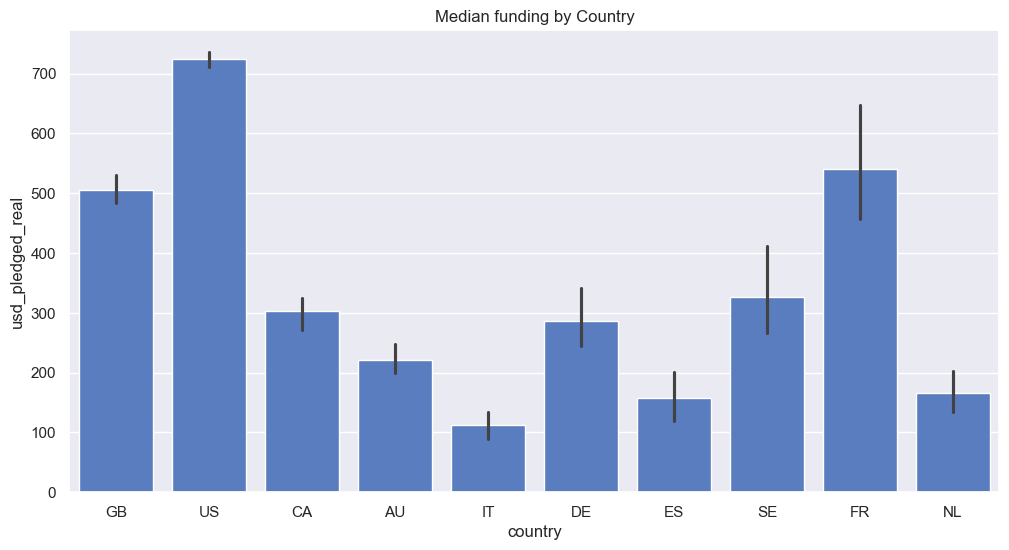

In [170]:
#funding by country(top 10)
top_coountries = df["country"].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.barplot(data=df[df["country"].isin(top_coountries)], x="country", y="usd_pledged_real", estimator=np.median)
plt.title("Median funding by Country")

Text(0.5, 1.0, 'Project State by Main Category')

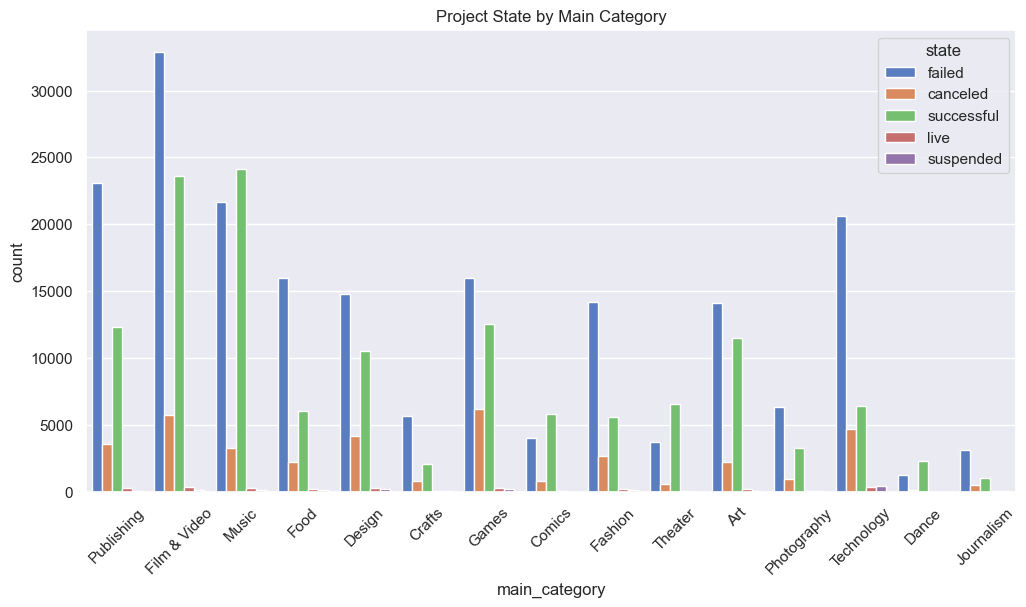

In [171]:
#success rate by main category
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="main_category", hue="state")
plt.xticks(rotation=45)
plt.title("Project State by Main Category")

Text(0.5, 1.0, 'Goal amount by Project State')

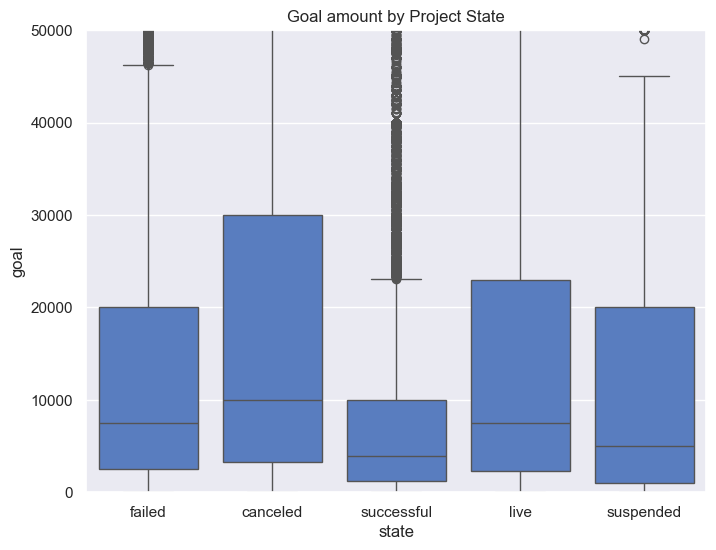

In [172]:
#goal vs state
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="state", y="goal")
plt.ylim(0,50000)
plt.title("Goal amount by Project State")

<b>Time-based Analysis</b>

In [174]:
#extract year and month
df["launch_year"] = df["launched"].dt.year
df["launch_month"] = df["launched"].dt.month

Text(0.5, 1.0, 'Projects per Year by State')

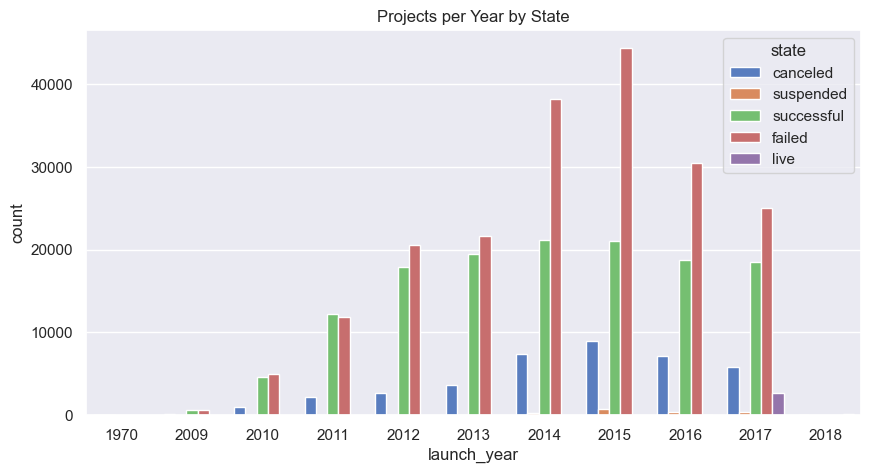

In [175]:
#projects per year
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="launch_year", hue="state")
plt.title("Projects per Year by State")

<b>Correlations</b>

Text(0.5, 1.0, 'Correlation Heatmap')

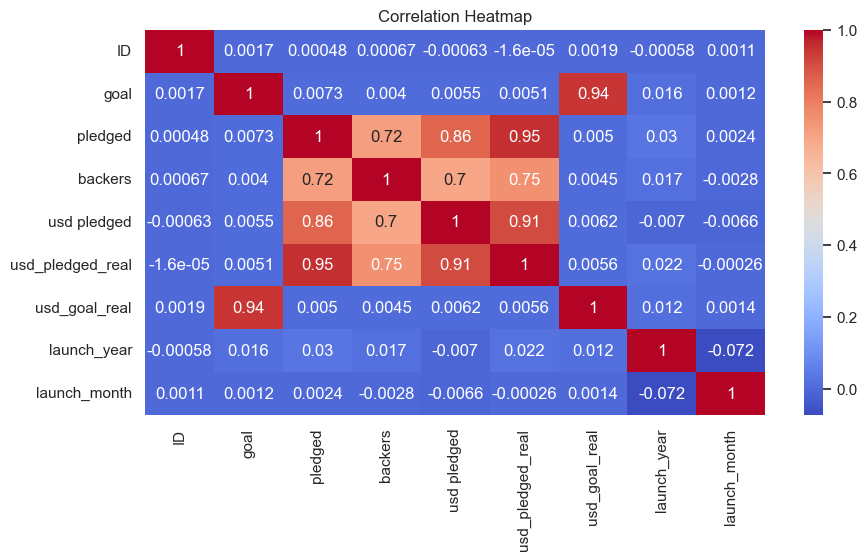

In [177]:
num_cols = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,5))
sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

<b>Saving Cleaned Data</b>

In [179]:
df.to_csv("../data/processed/01_eda_cleaned.csv", index=False)

<b>This ends the Explanatory Data Analysis part of the project</b>